<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_3_1_Classification_with_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.3.1 Classification with logistic regression

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Toy Datasets

In [2]:
data1 = pd.DataFrame({
        'x': [0, 1, 2, 3, 4, 5],
        'y': [0, 0, 0, 1, 1, 1]
})

data1

,x,y
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1
5,5,1


In [3]:
x_train1 = data1.drop('y', axis=1).values
y_train1 = data1['y'].values
x_train1, y_train1

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5]]),
 array([0, 0, 0, 1, 1, 1]))

In [4]:
pos1 = (y_train1 == 1)
neg1 = (y_train1 == 0)
pos1, neg1

(array([False, False, False,  True,  True,  True]),
 array([ True,  True,  True, False, False, False]))

In [5]:
data2 = pd.DataFrame({
        'x': [0, 1, 2, 3, 4, 5, 20],
        'y': [0, 0, 0, 1, 1, 1, 1]
})

data2

,x,y
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1
5,5,1
6,20,1


In [6]:
x_train2 = data2.drop('y', axis=1).values
y_train2 = data2['y'].values
x_train2, y_train2

(array([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [20]]),
 array([0, 0, 0, 1, 1, 1, 1]))

In [7]:
pos2 = (y_train2 == 1)
neg2 = (y_train2 == 0)
pos2, neg2

(array([False, False, False,  True,  True,  True,  True]),
 array([ True,  True,  True, False, False, False, False]))

## 1.3.1.1 Motivations

### Examples of classification problems

#### **Binary** classification: $y$ can only be one of two categories

- Is this email spam? - no or yes, false or true, 0 or 1
- Is the transaction fraudulent? - no or yes, false or true, 0 or 1
- Is the tumor malignant? - no or yes, false or true, 0 or 1

The 0 or false category is often called the **negative class** as opposed to the **positive class**

### How to build a classification algorithm

#### How about linear regression?

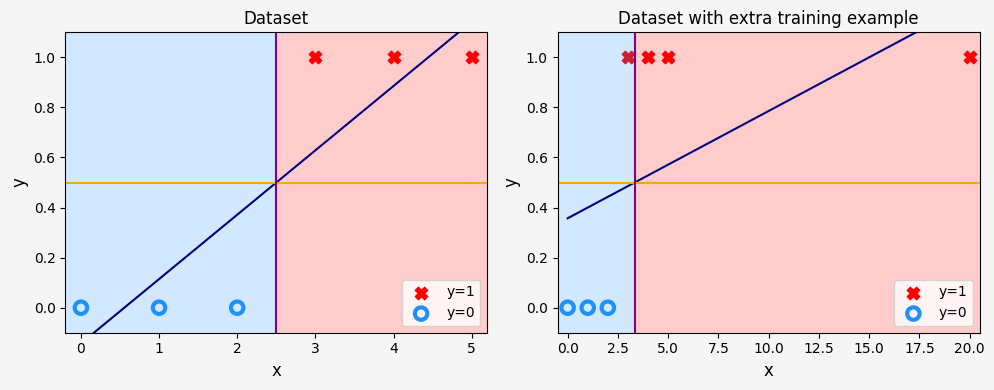

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.set_facecolor('whitesmoke')

# data1 boundary
xmin1 = -0.2
xmax1 = 5.2
ymin1 = -0.1
ymax1 = 1.1

# plot data1
ax[0].scatter(x_train1[pos1], y_train1[pos1],
              marker='X', s=80, c='red', label='y=1')
ax[0].scatter(x_train1[neg1], y_train1[neg1],
              marker='o', s=80, facecolors='none',
              edgecolor='dodgerblue', lw=3, label='y=0')
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_title('Dataset')
ax[0].set_xlim(xmin1, xmax1)
ax[0].set_ylim(ymin1, ymax1)
ax[0].legend(loc='lower right')

# plot regression line for data1
model1 = LinearRegression()
model1.fit(x_train1, y_train1)
w1 = model1.coef_[0]
b1 = model1.intercept_
regression_line = w1 * x_train1 + b1
ax[0].plot(x_train1, regression_line,
           c='navy', label='regression line')

# plot threshold
ax[0].axhline(0.5, c='orange', label='threshold')

# decision boundary
decision_boundary1 = (0.5 - b1) / w1
ax[0].axvline(decision_boundary1, c='purple', label='decision boundary')
ax[0].fill_betweenx((ymin1, ymax1),
                  xmin1, decision_boundary1,
                  facecolor='dodgerblue',
                  alpha=0.2, label='benign')
ax[0].fill_betweenx((ymin1, ymax1),
                  decision_boundary1, xmax1,
                  facecolor='red',
                  alpha=0.2, label='malignant')

# data2 boundary
xmin2 = -0.5
xmax2 = 20.5
ymin2 = -0.1
ymax2 = 1.1

# plot data2
ax[1].scatter(x_train2[pos2], y_train2[pos2],
              marker='X', s=80, c='red', label='y=1')
ax[1].scatter(x_train2[neg2], y_train2[neg2],
              marker='o', s=80, facecolors='none',
              edgecolor='dodgerblue', lw=3, label='y=0')
ax[1].set_xlabel('x', fontsize=12)
ax[1].set_ylabel('y', fontsize=12)
ax[1].set_title('Dataset with extra training example')
ax[1].set_xlim(xmin2, xmax2)
ax[1].set_ylim(ymin2, ymax2)
ax[1].legend(loc='lower right')

# plot regression line for data2
model2 = LinearRegression()
model2.fit(x_train2, y_train2)
w2 = model2.coef_[0]
b2 = model2.intercept_
regression_line2 = w2 * x_train2 + b2
ax[1].plot(x_train2, regression_line2,
           c='navy', label='regression line')

# plot threshold
ax[1].axhline(0.5, c='orange', label='threshold')

# decision boundary
decision_boundary2 = (0.5 - b2) / w2
ax[1].axvline(decision_boundary2, c='purple', label='decision boundary')
ax[1].fill_betweenx((ymin2, ymax2),
                  xmin2, decision_boundary2,
                  facecolor='dodgerblue',
                  alpha=0.2, label='benign')
ax[1].fill_betweenx((ymin2, ymax2),
                  decision_boundary2, xmax2,
                  facecolor='red',
                  alpha=0.2, label='malignant')


plt.tight_layout()
plt.show()

- We could pick a threshold (horizontal orange line), say $0.5$
 - if $f_{w,b}(x) \lt 0.5 \implies \widehat{y} = 0$
 - if $f_{w,b}(x) \ge 0.5 \implies \widehat{y} = 1$

- What if there is one more training example?
 - This single training example should not change how we classify the data, but it does
 - The original vertical dividing line (aka **decision boundary**) still makes sense
    - But the best fit line shifts over and we get a new decision boundary
        - a boundary that no longer makes sense!

## 1.3.1.2 Lab - Classification

https://colab.research.google.com/drive/1I_CCuK-RPtMr0qMJxydT3ptxhKn_kXPy

## 1.3.1.3 Logistic Regression

<img src='https://drive.google.com/uc?export=view&id=1PD3WtdeGq6-0lUy_woo6CyfbTDPdtJDJ'>

- Logistic Regression will fit a curve that looks like the s-shaped curve shown here
- The output label can only be 0 or 1



### The Sigmoid Function

The sigmoid function (aka logistic function) only has outputs between 0 and 1.

$$
g(z) = \frac{1}{1 + e^{-z}}
$$
<br>
$$
0 \lt g(z) \lt 1
$$

In [9]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0 / (1.0 + np.exp(-z))

    return g

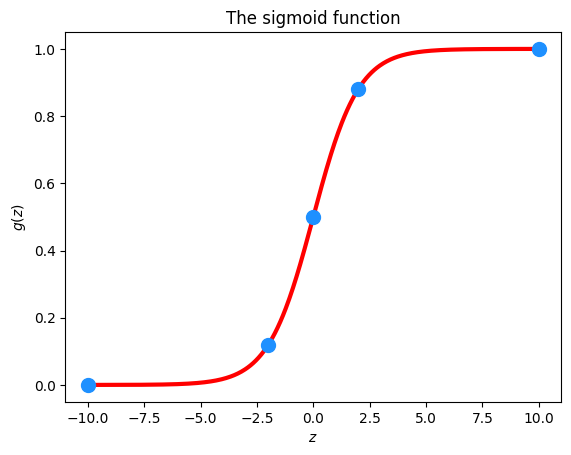

In [10]:
z = np.linspace(-10, 10, 500)
plt.plot(z, sigmoid(z), c='red', lw=3)

zs = np.array([-10, -2, 0, 2, 10])
plt.scatter(zs, sigmoid(zs), c='dodgerblue', s=100, zorder=100)

plt.xlabel('$z$')
plt.ylabel('$g(z)$')
plt.title('The sigmoid function')
plt.show()



<img src='https://drive.google.com/uc?export=view&id=1l7hWem5Eni4mXrFqLyiV2fgWrGI1AtJQ'>

- Note that the graph on the right, unlike that on the left, is centered at 0 on the z-axis
- When $z = 0$, $y = 0.5$

In [11]:
sigmoid(-100), sigmoid(0), sigmoid(100)

(3.7200759760208356e-44, 0.5, 1.0)

<img src='https://drive.google.com/uc?export=view&id=156WvzHWyqzJ66-tdg8YdjVdPg5T1NQbX'>

Building up to the **logistic regression** algorithm in two steps.

#### Step 1

- Recall that a straight line function, like the linear regression function, can be expressed as $\vec{w}\vec{x} + b$.
- Let's store that in the variable $z$
 - $z = \vec{w}\vec{x}+ b$

#### Step 2

- plug $z$ into the sigmoid function

$$
\begin{align}
f_{\vec{w},b}(\vec{x})
&= g(\vec{w}\vec{x} + b) \\
&= \frac{1}{1 + e^{-(\vec{w}\vec{x} + b)}}
\end{align}
$$

### Interpretation of Logistic Regression Output

 <img src='https://drive.google.com/uc?export=view&id=1gNJn6dZEKlgq8QZCfOUuQzEiDmkBpIUp'>

- think of the ouptut of logistic regression as the **probability** that the true class is 1
 - $P(y = 1)$

 $$
 P(y = 0) + P(y = 1) = 1
 $$

- You may see the following notation which means: "Probability that $y$ is 1, given input $\vec{x}$ and parameters $\vec{w},b$

 $$
 f_{\vec{w},b}(\vec{x}) = P(y = 1|\vec{x};\vec{w},b)
 $$

## 1.3.1.4 Lab - Sigmoid Function and Logistic Regression

https://colab.research.google.com/drive/14ma_UlR6Aa4VC0pt3TJNCU-ysB9dcARg

## 1.3.1.5 Decision Boundary

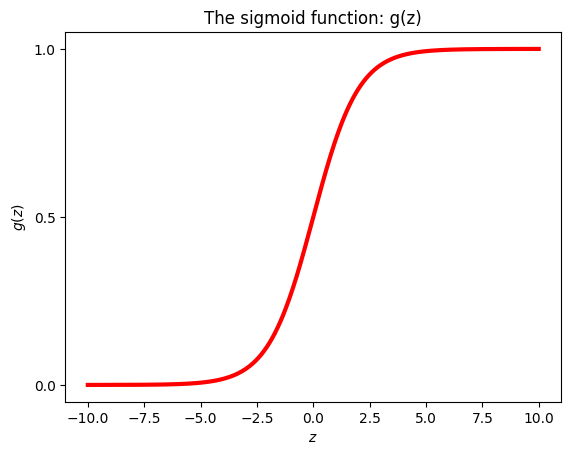

In [12]:
z = np.linspace(-10, 10, 500)
plt.plot(z, sigmoid(z), c='red', lw=3)

plt.yticks([0, 0.5, 1])
plt.xlabel('$z$')
plt.ylabel('$g(z)$')
plt.title('The sigmoid function: g(z)')
plt.show()

### Logistic Regression Recap

$$
\begin{align}
f_{\vec{w},b}(\vec{x})
&= g(\vec{w}\cdot\vec{x} + b) \\
&= \frac{1}{1 + e^{-(\vec{w}\vec{x} + b)}} \\
&= P(y = 1|\vec{x};\vec{w},b)
\end{align}
$$

- This returns a value between 0 and 1
- Given the return value, how is $\widehat{y}$ determined?
 - We could pick a **threshold**, say $0.5$:
   - if $f_{w,b}(x) \lt 0.5 \implies \widehat{y} = 0$
   - if $f_{w,b}(x) \ge 0.5 \implies \widehat{y} = 1$

### When is $f_{\vec{w},b}{(\vec{x})} \ge 0.5$?

- When $g(z) \ge 0.5$
    - Which happens when $z \ge 0$
        - Which happens when $\vec{w} \cdot \vec{x} + b \ge 0$

### Decision Boundary with Two Features

<img src='https://drive.google.com/uc?export=view&id=1mXwUn49nND_2B5dP2r6UON6oX1kSvMzr'>

$$
\begin{align}
f_{\vec{w},b}(\vec{x}) &= g(z) \\
&= g(w_1x_1 + w_2x_2 + b)
\end{align}
$$

Suppose:

$$
\begin{align}
w_1 &= 1 \\
w_2 &= 1 \\
b &= -3
\end{align}
$$

### The decision boundary is given by the following line:

$$
\begin{align}
z &= 0 \\
x_1 + x_2 - 3 &= 0 \\
x_1 + x_2 &= 3 \\
\end{align}
$$

<img src='https://drive.google.com/uc?export=view&id=18u_QHaMRh7hl2Jg1k8iH6fxBthbN4lgS'>

- The decision boundary depends on the values of $\vec{w}$ and $b$.


### Non-linear decision boundaries

<img src='https://drive.google.com/uc?export=view&id=1erjN9tiTHvk1S-Zws054YfBJa9dbR7PR'>

$$
\begin{align}
z &= w_1{x_1}^{2} + w_2{x_2}^{2} + b \\
f_{\vec{w},b}(\vec{x}) &= g(z) \\
&= g(w_1{x_1}^{2} + w_2{x_2}^{2} + b)
\end{align}
$$

Suppose:

$$
\begin{align}
w_1 &= 1 \\
w_2 &= 2 \\
b &= -1
\end{align}
$$

The decision boundary is given by the following:

$$
\begin{align}
z &= 0 \\
{x_1}^{2} + {x_2}^{2} - 1 &= 0 \\
{x_1}^{2} + {x_2}^{2} &= 1
\end{align}
$$

Which is a circle with radius 1.

<img src='https://drive.google.com/uc?export=view&id=1YMz2GTadWHNhrUJxUxPYdmSoLlwhYwCB'>

When: ${x_1}^2 + {x_2}^2 >= 1$ then $\widehat{y} = 1$
<br>
Else: $\widehat{y} = 0$

With logistic regression you can get even more complex descision boundaries.

<img src='https://drive.google.com/uc?export=view&id=1PHigWlTm8snH9irESnr_rAHxwosBAHqA'>





## 1.3.1.6 Lab - Decision Boundary

https://colab.research.google.com/drive/1F3VbDhKVBqBy6BeUqTwdNd8xYOGDgYGw